# L'effet d'un outlier sur un modèle de prédiction

*high leverage point*

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model

plt.rcParams["figure.figsize"] = [3, 3]

nous regardons l'impact du taux de criminalité des quartiers sur les prix des logements

les données contiennent les colonnes suivantes

```python
['HousePrice', 'HsPrc($10,000)', 'CrimeRate', 'MilesPhila', 'PopChg', 'Name', 'County']
```

nous ne sommes intéressés que par

```python
['Taux de criminalité', 'Prix de la maison']
```

notre question :
Quelle est l'influence de la colonne `CrimeRate` sur la colonne `HousePrice` ?

on lit le `csv` en ne gardant que les colonnes `CrimeRate` and `HousePrice`  
utilisation du paramètre `usecols` de `pandas.read_csv`

In [3]:
filename = 'Philadelphia_Crime_Rate_noNA.csv'
philadelphia = pd.read_csv(filename,
                           usecols=['CrimeRate', 'HousePrice'],
                           sep=',')

In [4]:
philadelphia.head()

,HousePrice,CrimeRate
0,140463,29.7
1,113033,24.1
2,124186,19.5
3,110490,49.4
4,79124,54.1


In [5]:
philadelphia.shape

(99, 2)

In [6]:
philadelphia.dtypes

HousePrice      int64
CrimeRate     float64
dtype: object

In [7]:
philadelphia.describe()

,HousePrice,CrimeRate
count,99.000000,99.000000
mean,157835.606061,32.576768
std,86644.159973,37.540908
min,28000.000000,6.600000
25%,98505.000000,17.400000
50%,140463.000000,24.100000
75%,195830.000000,39.800000
max,475112.000000,366.100000


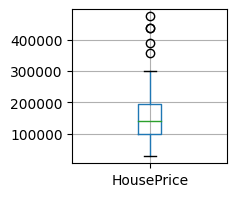

In [8]:
philadelphia[['HousePrice']].boxplot(figsize=(2, 2))
plt.show()

In [ ]:
# plt.boxplot?

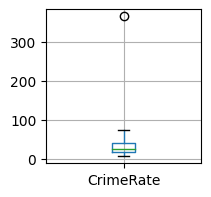

In [9]:
philadelphia[['CrimeRate']].boxplot(figsize=(2, 2))
plt.show()

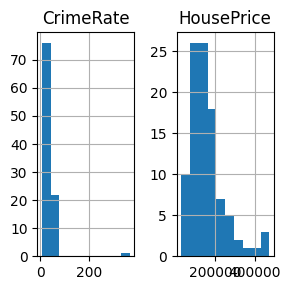

In [10]:
philadelphia[['CrimeRate', 'HousePrice',]].hist(bins=10)
plt.tight_layout()
plt.show()

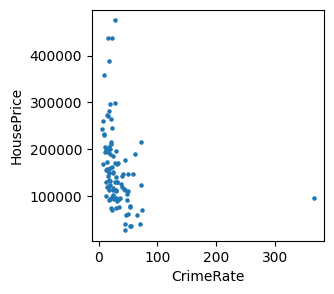

In [11]:
philadelphia.plot.scatter(x='CrimeRate', y='HousePrice', marker='.')
plt.show()

## prediction en présence de l'outlier

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
philadelphia.shape

(99, 2)

In [15]:
philadelphia[['CrimeRate']].shape

(99, 1)

In [16]:
X = philadelphia[['CrimeRate']] # we input a dataframe
y = philadelphia['HousePrice']  # we predict a colonne

In [17]:
X_std = StandardScaler().fit_transform(X)

In [18]:
X_std = StandardScaler().fit(X).transform(X)

il faudrait utiliser un pipeline  
on le laisse en exercice

In [19]:
regr = LinearRegression()

In [20]:
regr = regr.fit(X_std, y)

on regarde les valeurs des paramètres `intercept_` et `coef_` qui ont été entraînés

In [21]:
regr.intercept_, regr.coef_[0]

(157835.60606060605, -21547.99513251901)

on prédit nos valeurs pour `y`

In [22]:
y_predict = regr.predict(X_std)

In [23]:
from sklearn.metrics import mean_squared_error

on calcule l'erreur

In [24]:
mean_squared_error(y_predict, y) # ouh elle est très grande

6967063954.553143

on calcule le score  
on choisit *the coefficient of determination $r^2$ of the prediction*  
soit la méthode `score` de la regression  
soit la fonction `r2_score` de `metrics`

In [25]:
from sklearn.metrics import r2_score

ce score est défini comme $1 - \dfrac{u}{v}$ où
- $u$ est la MSE entre $y$ et $y_{pred}$
- $v$ est ((y_true - y_true.mean()) ** 2).sum()

un modèle constant qui prédirait toujours l'espérance de `y`, quelle que soit l'entrée a un score de $0$  
le meilleur score est à $1$

dans l'implémentation `score` ou `metrics.r2_score` si $v$ est $0$ (`y` constant) la fonction renvoie, pr défaut,  $1$ 

In [26]:
u = np.sum(np.square(y - y_predict))
v = np.sum(np.square(y - np.mean(y)))

1 - (u/v)

0.06248046677508112

In [27]:
regr.score(X_std, y)

0.06248046677508112

In [28]:
r2_score(y, y_predict)

0.06248046677508112

il est très mauvais il rejoint le score naïf

on plot le `y` prédit et le `y` mesuré (celui du csv)  
en fonction de la colonne `CrimeRate`

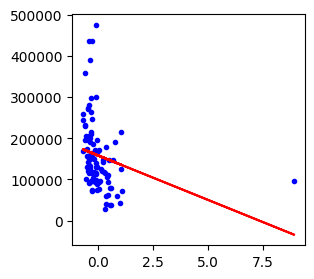

In [29]:
plt.plot(X_std, y, 'b.')
plt.plot(X_std, y_predict, 'r-'); # la droite des prédictions
plt.show()

idem si on plot la ligne `y = intercept + coeff_0 X`

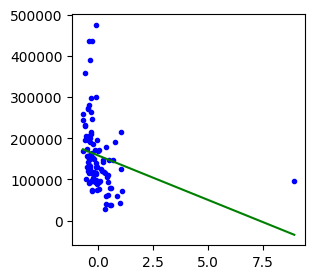

In [30]:
plt.plot(X_std, y, 'b.')
plt.plot([np.min(X_std), np.max(X_std)],
         [(regr.intercept_ + regr.coef_[0] * i) for i in [np.min(X_std), np.max(X_std)]], 'g-');
plt.show()

la droite de regression est clairement attirée par le point extrême 

## prediction en absence de l'outlier

on va enlever notre outlier

In [31]:
philadelphia['CrimeRate'].argmax() # on le cherche

62

In [32]:
philadelphia['CrimeRate'].max()

366.1

In [33]:
philadelphia.iloc[62] # c'est donc lui

HousePrice    96200.0
CrimeRate       366.1
Name: 62, dtype: float64

In [34]:
philadelphia.drop(62, axis=0, inplace=True) # on le drop (axis à 0 parce qu'on drop une observation)
                                            # (1 ce sont les colones)

et on recommence tout ...

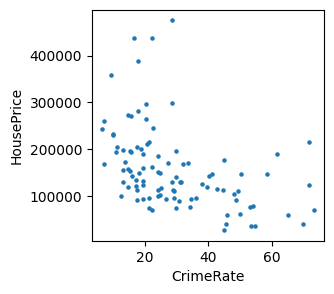

In [35]:
philadelphia.plot.scatter(x='CrimeRate', y='HousePrice', marker='.', figsize=(3, 3))
plt.show()

In [36]:
X = philadelphia[['CrimeRate']] # we input a dataframe
y = philadelphia['HousePrice']  # we predict a colonne

X_std = StandardScaler().fit_transform(X)
regr = linear_model.LinearRegression()
regr = regr.fit(X_std, y)

y_predict = regr.predict(X_std)

regr.score(X_std, y)

0.18422882936911944

il est un peu moins mauvais

In [37]:
plt.plot(X_std, y, 'b.')
plt.plot(X_std, y_predict, 'r-'); # la droite des prédictions

idem si on plot la ligne `y = intercept + coeff_0 X`

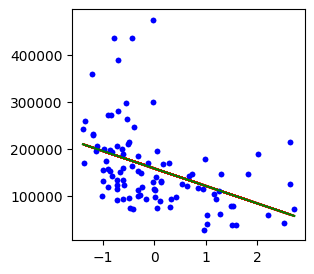

In [38]:
plt.plot(X_std, y, 'b.')
plt.plot([np.min(X_std), np.max(X_std)],
         [(regr.intercept_ + regr.coef_[0] * i) for i in [np.min(X_std), np.max(X_std)]], 'g-');
plt.show()

END